# 1.Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


from google.colab import drive
drive.mount('/content/drive')

# 2. Loading data

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
fake['flag'] = 0
fake

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
true = pd.read_csv('/content/drive/MyDrive/True.csv')
true['flag'] = 1
true

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df = pd.DataFrame()
df = true.append(fake)

<ipython-input-5-00c0ad65422b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = true.append(fake)


#3. EDA + Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
# Correcting some data
df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')


df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

In [ ]:
df['date'] = df['date'].str.replace(' ', '')

In [ ]:
for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)

<ipython-input-10-6ce7f41da994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)


In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

In [ ]:
sub = df[['month', 'flag']]
sub = sub.dropna()
sub = sub.groupby(['month'])['flag'].sum()

In [ ]:
sub = sub.drop('NaT')

In [ ]:
sub2 = df[['subject', 'flag']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['flag'].sum()

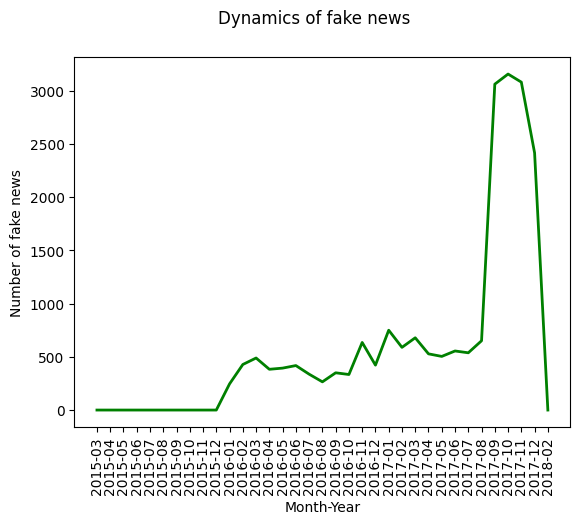

In [ ]:
import matplotlib.pyplot as plt

plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

<BarContainer object of 8 artists>

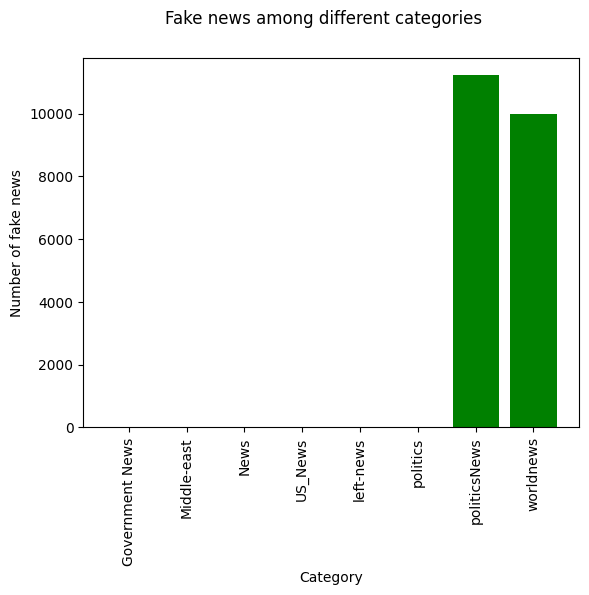

In [ ]:
plt.suptitle('Fake news among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')
#ax1.plot(x, y)
#ax2.plot(x, -y)

# 4.ML Models

In [ ]:
nlp = df

Word Cloud visualization
A word cloud, or tag cloud, is a textual data visualization which allows anyone to see in a single glance the words which have the highest frequency within a given body of text. Word clouds are typically used as a tool for processing, analyzing and disseminating qualitative sentiment data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['flag'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names_out() 
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

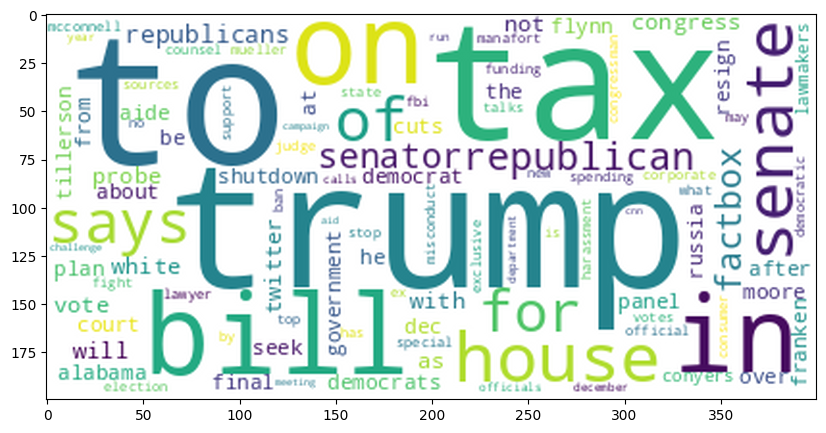

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='blackman')

Tfidf-vectorizing:
TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

In [ ]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#extract features from text data
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['flag'], test_size=0.25, random_state=1)

# Model building

Linear SVC:LinearSVC is a classification algorithm that belongs to the family of linear support vector machines (SVMs).

It is used for binary classification problems, where the goal is to assign each data point to one of two classes based on a set of features

In [1]:
scores = {}

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#classifier
clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print(cross_val_score(clf, X_text, nlp['flag'], cv=3)) #The cross-validation score is a measure of how well the classifier performs on unseen data.
print(accuracy_score(y_pred_SVM, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVM, y_test)


[0.91112304 0.930384   0.92716165]
0.9607983531728274


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

acc_score = accuracy_score(y_test, y_pred_SVM)

# Print accuracy score
print("Accuracy Score:", acc_score)

# Print classification matrix
print("Classification Matrix:")
print(confusion_matrix(y_test, y_pred_SVM))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_SVM))

Accuracy Score: 0.9607983531728274
Classification Matrix:
[[5615  232]
 [ 206 5120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5847
           1       0.96      0.96      0.96      5326

    accuracy                           0.96     11173
   macro avg       0.96      0.96      0.96     11173
weighted avg       0.96      0.96      0.96     11173



#Naive Bayes
The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. it takes each feature and treats it is unrelated to any other feature and it can handle a large no of dataset .It is particularly useful for the text classification like fake news detection.
MultinomialNB() is a classification algorithm based on the Naive Bayes theorem, which is commonly used for text classification tasks. It is a variant of the Naive Bayes algorithm that is optimized for features that represent count or frequency data, such as the counts of words in a document.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#classifier
clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

y_pred_MNB = clf2.predict(X_test)
print(cross_val_score(clf2, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_MNB, y_test))

scores['MultinomialNB'] = accuracy_score(y_pred_MNB, y_test)

[0.88957508 0.89399839 0.92883996]
0.9398550076076255


In [ ]:
acc_score = accuracy_score(y_test, y_pred_MNB)

# Print accuracy score
print("Accuracy Score:", acc_score)

# Print classification matrix
print("Classification Matrix:")
print(confusion_matrix(y_test, y_pred_MNB))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_MNB))

Accuracy Score: 0.9398550076076255
Classification Matrix:
[[5616  231]
 [ 441 4885]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5847
           1       0.95      0.92      0.94      5326

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



This classification model assumes that all features are independent of one another, which is not always true when identifying fake news articles.